In [242]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import seaborn as sns

df0 = pd.read_csv('E0.csv')
df1 = pd.read_csv('E0 (1).csv')
df2 = pd.read_csv('E0 (2).csv')
df3 = pd.read_csv('E0 (3).csv')
df4 = pd.read_csv('E0 (4).csv')
df5 = pd.read_csv('E0 (5).csv')
df6 = pd.read_csv('E0 (6).csv')
df7 = pd.read_csv('E0 (7).csv')
df8 = pd.read_csv('E0 (8).csv')
df9 = pd.read_csv('E0 (9).csv')
df10 = pd.read_csv('E0 (10).csv')

print(df0.shape)
df0.head()


(380, 106)


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [243]:
#concat df's 
frames = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

df = pd.concat(frames)
df.tail()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
375,E0,22/05/11,NaN,Newcastle,West Brom,3.0,3.0,D,2.0,0.0,...,3.40,2.00,3.30,3.60,2.00,3.25,3.50,2.00,3.25,3.4
376,E0,22/05/11,NaN,Stoke,Wigan,0.0,1.0,A,0.0,0.0,...,2.40,2.75,3.30,2.40,2.62,3.50,2.38,2.70,3.40,2.3
377,E0,22/05/11,NaN,Tottenham,Birmingham,2.0,1.0,H,0.0,0.0,...,6.00,1.55,3.75,6.00,1.50,4.00,6.00,1.53,3.80,5.5
378,E0,22/05/11,NaN,West Ham,Sunderland,0.0,3.0,A,0.0,1.0,...,3.60,1.90,3.40,3.80,2.00,3.25,3.60,1.90,3.40,3.6
379,E0,22/05/11,NaN,Wolves,Blackburn,2.0,3.0,A,0.0,3.0,...,3.75,2.05,3.10,3.75,2.10,3.00,3.50,2.05,3.10,3.4


In [244]:
#load team stats and match team names to dataset for join
team_stats = pd.read_csv('stats.csv')

team_stats.team_name = team_stats.replace({
    'West Ham United': 'West Ham',
    'West Bromwich Albion': 'West Brom',
    'Tottenham Hotspur': 'Tottenham',
    'Brighton and Hove Albion': 'Brighton',
    'Leeds United': 'Leeds',
    'Manchester United': 'Man United',
    'Newcastle United': 'Newcastle',
    'Leicester City': 'Leicester',
    'Wolverhampton Wanderers': 'Wolves',
    'Manchester City': 'Man City',
    'AFC Bournemouth': 'Bournemouth',
    'Norwich City': 'Norwich',
    'Huddersfield Town': 'Huddersfield',
    'Cardiff City': 'Cardiff',
    'Stoke City': 'Stoke',
    'Swansea City': 'Swansea',
    'Hull City': 'Hull',
    'Queens Park Rangers': 'QPR',
    'Wigan Athletic': 'Wigan',
    'Blackburn Rovers': 'Blackburn',
    'Bolton Wanderers': 'Bolton',
    'Birmingham City': 'Birmingham'
    })

print(team_stats.shape)
team_stats.head()


(37, 8)


,team_name,big_chances_per_game,pass_per_match,tackle_success_per_game,cross_accuracy,headed_clearance_per_game,interceptions_per_game,clearances_per_game
0,Fulham,0.464912,277.49,0.001281,0.23,7.175439,9.664912,23.533333
1,Crystal Palace,0.661638,236.13,0.001466,0.24,9.258621,9.450431,17.575431
2,Liverpool,0.670852,271.49,0.000655,0.22,4.780269,6.422422,13.376682
3,West Ham,0.467641,208.73,0.000741,0.24,7.015658,7.377871,18.346555
4,West Brom,0.706478,276.70,0.001457,0.23,9.528340,11.190283,21.635628


In [245]:
#create new ht_ and at_ columns for team stats
data = pd.merge(df, team_stats, left_on='HomeTeam', right_on='team_name')

#rename columns
new_name_dict = {
    'big_chances_per_game': 'ht_big_chances_per_game',
    'pass_per_match': 'ht_pass_per_match',
    'tackle_success_per_game': 'ht_tackle_success_per_game',
    'cross_accuracy': 'ht_cross_accuracy',
    'headed_clearance_per_game': 'ht_headed_clearance_per_game',
    'interceptions_per_game': 'ht_interceptions_per_game',
    'clearances_per_game': 'ht_clearances_per_game'
}

#rename columns with ht_ prefix for home team
data.rename(columns=new_name_dict, inplace=True)

data.head()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,SBD,SBA,team_name,ht_big_chances_per_game,ht_pass_per_match,ht_tackle_success_per_game,ht_cross_accuracy,ht_headed_clearance_per_game,ht_interceptions_per_game,ht_clearances_per_game
0,E0,12/09/2020,12:30,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,...,NaN,NaN,Fulham,0.464912,277.49,0.001281,0.23,7.175439,9.664912,23.533333
1,E0,28/09/2020,17:45,Fulham,Aston Villa,0.0,3.0,A,0.0,2.0,...,NaN,NaN,Fulham,0.464912,277.49,0.001281,0.23,7.175439,9.664912,23.533333
2,E0,24/10/2020,15:00,Fulham,Crystal Palace,1.0,2.0,A,0.0,1.0,...,NaN,NaN,Fulham,0.464912,277.49,0.001281,0.23,7.175439,9.664912,23.533333
3,E0,02/11/2020,17:30,Fulham,West Brom,2.0,0.0,H,2.0,0.0,...,NaN,NaN,Fulham,0.464912,277.49,0.001281,0.23,7.175439,9.664912,23.533333
4,E0,22/11/2020,12:00,Fulham,Everton,2.0,3.0,A,1.0,3.0,...,NaN,NaN,Fulham,0.464912,277.49,0.001281,0.23,7.175439,9.664912,23.533333


In [246]:
#add stats for away team stats
data = pd.merge(data, team_stats, left_on='AwayTeam', right_on='team_name')

#rename columns
new_name_dict_2 = {
    'big_chances_per_game': 'at_big_chances_per_game',
    'pass_per_match': 'at_pass_per_match',
    'tackle_success_per_game': 'at_tackle_success_per_game',
    'cross_accuracy': 'at_cross_accuracy',
    'headed_clearance_per_game': 'at_headed_clearance_per_game',
    'interceptions_per_game': 'at_interceptions_per_game',
    'clearances_per_game': 'at_clearances_per_game'
}

#rename columns with ht_ prefix for home team
data.rename(columns=new_name_dict_2, inplace=True)
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,ht_interceptions_per_game,ht_clearances_per_game,team_name_y,at_big_chances_per_game,at_pass_per_match,at_tackle_success_per_game,at_cross_accuracy,at_headed_clearance_per_game,at_interceptions_per_game,at_clearances_per_game
0,E0,12/09/2020,12:30,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,...,9.664912,23.533333,Arsenal,0.704668,274.66,0.000646,0.21,5.113106,7.648115,13.447935
1,E0,07/10/2018,NaN,Fulham,Arsenal,1.0,5.0,A,1.0,1.0,...,9.664912,23.533333,Arsenal,0.704668,274.66,0.000646,0.21,5.113106,7.648115,13.447935
2,E0,24/08/13,NaN,Fulham,Arsenal,1.0,3.0,A,0.0,2.0,...,9.664912,23.533333,Arsenal,0.704668,274.66,0.000646,0.21,5.113106,7.648115,13.447935
3,E0,20/04/13,NaN,Fulham,Arsenal,0.0,1.0,A,0.0,1.0,...,9.664912,23.533333,Arsenal,0.704668,274.66,0.000646,0.21,5.113106,7.648115,13.447935
4,E0,02/01/12,NaN,Fulham,Arsenal,2.0,1.0,H,0.0,1.0,...,9.664912,23.533333,Arsenal,0.704668,274.66,0.000646,0.21,5.113106,7.648115,13.447935


In [247]:
#drop unneeded columns
for col in data.columns:
    print(col)


Div
Date
Time
HomeTeam
AwayTeam
FTHG
FTAG
FTR
HTHG
HTAG
HTR
Referee
HS
AS
HST
AST
HF
AF
HC
AC
HY
AY
HR
AR
B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
PSH
PSD
PSA
WHH
WHD
WHA
VCH
VCD
VCA
MaxH
MaxD
MaxA
AvgH
AvgD
AvgA
B365>2.5
B365<2.5
P>2.5
P<2.5
Max>2.5
Max<2.5
Avg>2.5
Avg<2.5
AHh
B365AHH
B365AHA
PAHH
PAHA
MaxAHH
MaxAHA
AvgAHH
AvgAHA
B365CH
B365CD
B365CA
BWCH
BWCD
BWCA
IWCH
IWCD
IWCA
PSCH
PSCD
PSCA
WHCH
WHCD
WHCA
VCCH
VCCD
VCCA
MaxCH
MaxCD
MaxCA
AvgCH
AvgCD
AvgCA
B365C>2.5
B365C<2.5
PC>2.5
PC<2.5
MaxC>2.5
MaxC<2.5
AvgC>2.5
AvgC<2.5
AHCh
B365CAHH
B365CAHA
PCAHH
PCAHA
MaxCAHH
MaxCAHA
AvgCAHH
AvgCAHA
Bb1X2
BbMxH
BbAvH
BbMxD
BbAvD
BbMxA
BbAvA
BbOU
BbMx>2.5
BbAv>2.5
BbMx<2.5
BbAv<2.5
BbAH
BbAHh
BbMxAHH
BbAvAHH
BbMxAHA
BbAvAHA
LBH
LBD
LBA
SJH
SJD
SJA
GBH
GBD
GBA
BSH
BSD
BSA
SBH
SBD
SBA
team_name_x
ht_big_chances_per_game
ht_pass_per_match
ht_tackle_success_per_game
ht_cross_accuracy
ht_headed_clearance_per_game
ht_interceptions_per_game
ht_clearances_per_game
team_name_y
at_big_chances_per_gam

In [248]:
data.isna().sum()

Div                                0
Date                               0
Time                            3420
HomeTeam                           0
AwayTeam                           0
                                ... 
at_tackle_success_per_game         0
at_cross_accuracy                  0
at_headed_clearance_per_game       0
at_interceptions_per_game          0
at_clearances_per_game             0
Length: 155, dtype: int64

In [249]:
#lowercase all columns names and list unique team names
data.columns = [x.lower() for x in data.columns]
print(data.hometeam.nunique())
print(data.hometeam.nunique())
data.hometeam.unique()


37
37


array(['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom',
       'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds',
       'Man United', 'Southampton', 'Newcastle', 'Chelsea', 'Leicester',
       'Aston Villa', 'Wolves', 'Burnley', 'Man City', 'Bournemouth',
       'Watford', 'Norwich', 'Huddersfield', 'Cardiff', 'Stoke',
       'Swansea', 'Hull', 'Middlesbrough', 'Sunderland', 'QPR', 'Reading',
       'Wigan', 'Blackburn', 'Bolton', 'Birmingham', 'Blackpool',
       'Arsenal'], dtype=object)

In [250]:
#select columns for data prep (seperate into two datasets, one with stats and one with betting odds to compare performance)
keep_cols_stats = ['hometeam', 'awayteam', 'ftr','fthg', 'ftag', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'b365h', 'b365d', 'b365a']
keep_cols_bets = ['b365h', 'b365d', 'b365a', 'vch', 'vcd', 'vca', 'bwh', 'bwd', 'bwa', 'whh', 'whd', 'whh']

#create dataframes
data_stats = pd.DataFrame(data[keep_cols_stats])
data_bets = pd.DataFrame(data[keep_cols_bets])

data_stats.head()


,hometeam,awayteam,ftr,fthg,ftag,hs,as,hst,ast,hf,af,hc,ac,hy,ay,b365h,b365d,b365a
0,Fulham,Arsenal,A,0.0,3.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,6.00,4.33,1.53
1,Fulham,Arsenal,A,1.0,5.0,21.0,9.0,4.0,7.0,11.0,12.0,4.0,2.0,2.0,0.0,5.25,4.33,1.66
2,Fulham,Arsenal,A,1.0,3.0,16.0,18.0,7.0,7.0,10.0,8.0,1.0,8.0,2.0,2.0,3.80,3.50,2.10
3,Fulham,Arsenal,A,0.0,1.0,7.0,10.0,5.0,7.0,13.0,8.0,7.0,3.0,0.0,2.0,5.00,4.00,1.75
4,Fulham,Arsenal,H,2.0,1.0,21.0,17.0,8.0,10.0,6.0,12.0,4.0,3.0,0.0,1.0,4.00,3.50,1.91


In [251]:
#look for null values
print(data_stats.isna().sum())
print(data_bets.fillna(method='ffill').isna().sum())


hometeam    0
awayteam    0
ftr         0
fthg        0
ftag        0
hs          0
as          0
hst         0
ast         0
hf          0
af          0
hc          0
ac          0
hy          0
ay          0
b365h       0
b365d       0
b365a       0
dtype: int64
b365h    0
b365d    0
b365a    0
vch      0
vcd      0
vca      0
bwh      0
bwd      0
bwa      0
whh      0
whd      0
whh      0
dtype: int64


<AxesSubplot:>

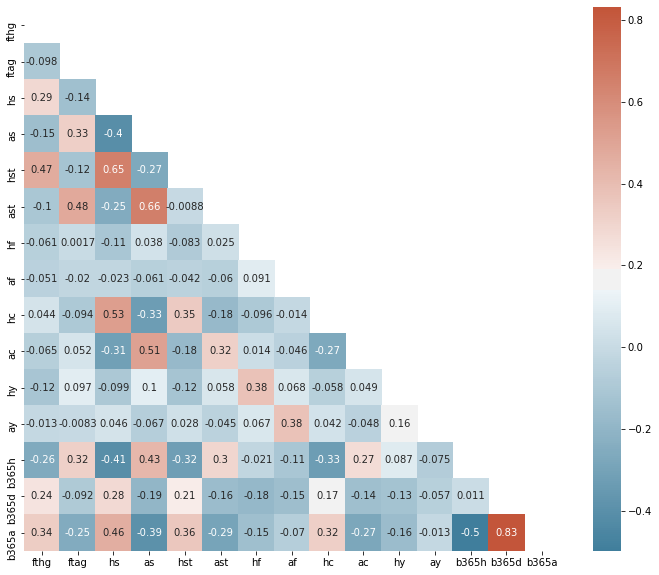

In [269]:
import seaborn as sns

#correlation heatmap
corr = data_stats.corr()

fig,ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [252]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#get targets
y = data.ftr
y_htg = data.fthg
y_atg = data.ftag

#get final dataset for OHE + scaling
data_final = data_stats.copy()
data_final.drop(['ftr', 'fthg', 'ftag'], axis=1, inplace=True)

#get numerical cols for scaling
categorical_cols = [cname for cname in data_final.columns if data_final[cname].dtype == "object"]
numerical_cols_stats = [cname for cname in data_final.columns if data_final[cname].dtype in ['float64', 'int64']]

#onehotencode categorical variables
cols = categorical_cols + numerical_cols_stats
data_final_ = data_final[cols]
ohe_final = pd.get_dummies(data_final_)
ohe_final.head()


,hs,as,hst,ast,hf,af,hc,ac,hy,ay,...,awayteam_Southampton,awayteam_Stoke,awayteam_Sunderland,awayteam_Swansea,awayteam_Tottenham,awayteam_Watford,awayteam_West Brom,awayteam_West Ham,awayteam_Wigan,awayteam_Wolves
0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,9.0,4.0,7.0,11.0,12.0,4.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,18.0,7.0,7.0,10.0,8.0,1.0,8.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,10.0,5.0,7.0,13.0,8.0,7.0,3.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,17.0,8.0,10.0,6.0,12.0,4.0,3.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
#use scalers on dataset
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(ohe_final)

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(ohe_final)


In [254]:
ohe_final.to_csv("football_data.csv")

In [255]:
#split test and train data
X_mm = mm_scaled
X_std = std_scaled

X_train_mm, X_test_mm, Y_train_mm, Y_test_mm = train_test_split(X_mm, y, test_size=0.25, random_state=7)
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(X_std, y, test_size=0.25, random_state=7)


In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#load and fit models
gnb = GaussianNB()
forest = RandomForestClassifier(random_state=7)
log_reg = LogisticRegression()
#xgb = XGBRegressor()

#fit data to models and predict (gausian nb)
y_pred_gnb_mm = gnb.fit(X_train_mm, Y_train_mm).predict(X_test_mm)
y_pred_gnb_std = gnb.fit(X_train_std, Y_train_std).predict(X_test_std)

#random forest classifier
y_pred_forest_mm = forest.fit(X_train_mm, Y_train_mm).predict(X_test_mm)
y_pred_forest_std = forest.fit(X_train_std, Y_train_std).predict(X_test_std)

#logistic regression
y_pred_log_reg_mm = log_reg.fit(X_train_mm, Y_train_mm).predict(X_test_mm)
y_pred_log_reg_std = log_reg.fit(X_train_std, Y_train_std).predict(X_test_std)


In [257]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print results 
print(f"Gaussian NB (Min Max Scaled) Number of mislabeled points out of a total {X_test_mm.shape[0]} points : {(Y_test_mm != y_pred_gnb_mm).sum()}")
print(f"Gaussian NB (Standard Scaled) Number of mislabeled points out of a total {X_test_std.shape[0]} points : {(Y_test_std != y_pred_gnb_std).sum()}")
print(f"Random Forest Min Max Scaled Score: {accuracy_score(Y_test_mm, y_pred_forest_mm)}")
print(f"Random Forest Standard Scaled Score: {accuracy_score(Y_test_std, y_pred_forest_std)}")
print(f"Log Reg Min Max Scaled Score: {accuracy_score(Y_test_mm, y_pred_log_reg_mm)}")
print(f"Log Reg Standard Scaled Score: {accuracy_score(Y_test_std, y_pred_log_reg_std)}")


Gaussian NB (Min Max Scaled) Number of mislabeled points out of a total 1045 points : 610
Gaussian NB (Standard Scaled) Number of mislabeled points out of a total 1045 points : 619
Random Forest Min Max Scaled Score: 0.6028708133971292
Random Forest Standard Scaled Score: 0.6
Log Reg Min Max Scaled Score: 0.5923444976076555
Log Reg Standard Scaled Score: 0.5894736842105263


In [258]:
#view confusion matrix of best performers
print('Confusion matrix of Random Forest Classifier')
print(confusion_matrix(Y_test_mm, y_pred_forest_mm))
print('\n Confusion matrix of Log Reg')
print(confusion_matrix(Y_test_std, y_pred_log_reg_std))


Confusion matrix of Random Forest Classifier
[[201  31  80]
 [ 98  35 121]
 [ 55  30 394]]

 Confusion matrix of Log Reg
[[214  27  71]
 [106  28 120]
 [ 62  43 374]]


In [259]:
for col in data_final.columns:
    print(col)

hometeam
awayteam
hs
as
hst
ast
hf
af
hc
ac
hy
ay
b365h
b365d
b365a


In [260]:
#random forest feature importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i}, {ohe_final.columns[i]} Score: {v}')


Feature: 0, hs Score: 0.05821946063550933
Feature: 1, as Score: 0.056538539493338515
Feature: 2, hst Score: 0.08027772545104117
Feature: 3, ast Score: 0.06664797720969037
Feature: 4, hf Score: 0.05138651771686487
Feature: 5, af Score: 0.05094272570393307
Feature: 6, hc Score: 0.0519540523080383
Feature: 7, ac Score: 0.05149324039452462
Feature: 8, hy Score: 0.034083759869646846
Feature: 9, ay Score: 0.034782963291543775
Feature: 10, b365h Score: 0.08229062876090079
Feature: 11, b365d Score: 0.05493644749959837
Feature: 12, b365a Score: 0.0816202676087848
Feature: 13, hometeam_Arsenal Score: 0.005264182451207515
Feature: 14, hometeam_Aston Villa Score: 0.004370859300730878
Feature: 15, hometeam_Birmingham Score: 0.0008962286678975758
Feature: 16, hometeam_Blackburn Score: 0.0022396774015283993
Feature: 17, hometeam_Blackpool Score: 0.0009854650418927018
Feature: 18, hometeam_Bolton Score: 0.0016285315431277775
Feature: 19, hometeam_Bournemouth Score: 0.002935569350142057
Feature: 20, ho

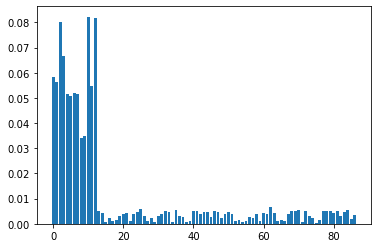

In [261]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [262]:
#get targets
y = data.ftr
y_htg = data.fthg
y_atg = data.ftag

#get final dataset for OHE + scaling
data_final_bets = data_bets.copy()

ohe_final_bets = pd.get_dummies(data_final_)
ohe_final_bets.head()

,hs,as,hst,ast,hf,af,hc,ac,hy,ay,...,awayteam_Southampton,awayteam_Stoke,awayteam_Sunderland,awayteam_Swansea,awayteam_Tottenham,awayteam_Watford,awayteam_West Brom,awayteam_West Ham,awayteam_Wigan,awayteam_Wolves
0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,9.0,4.0,7.0,11.0,12.0,4.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,18.0,7.0,7.0,10.0,8.0,1.0,8.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,10.0,5.0,7.0,13.0,8.0,7.0,3.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,17.0,8.0,10.0,6.0,12.0,4.0,3.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
#use scalers on dataset
#mm_scaler = MinMaxScaler()
mm_scaled_bets = mm_scaler.fit_transform(ohe_final_bets)

#std_scaler = StandardScaler()
std_scaled_bets = std_scaler.fit_transform(ohe_final_bets)


In [265]:
#replace y with numbers for target
y_target = y.replace("H", 1).replace("D", 0).replace("A", -1)

#split test and train data
X_mm_s = mm_scaled_bets
X_std_s = std_scaled_bets

X_train_mm, X_test_mm, Y_train_mm, Y_test_mm = train_test_split(X_mm_s, y_target, test_size=0.25, random_state=7)
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(X_std_s, y_target, test_size=0.25, random_state=7)


In [266]:
#load and fit models
gnb = GaussianNB()
forest = RandomForestClassifier(random_state=7)
log_reg = LogisticRegression()
#xgb = XGBRegressor()

#fit data to models and predict (gausian nb)
y_pred_gnb_mm = gnb.fit(X_train_mm, Y_train_mm).predict(X_test_mm)
y_pred_gnb_std = gnb.fit(X_train_std, Y_train_std).predict(X_test_std)

#random forest classifier
y_pred_forest_mm = forest.fit(X_train_mm, Y_train_mm).predict(X_test_mm)
y_pred_forest_std = forest.fit(X_train_std, Y_train_std).predict(X_test_std)

#logistic regression
y_pred_log_reg_mm = log_reg.fit(X_train_mm, Y_train_mm).predict(X_test_mm)
y_pred_log_reg_std = log_reg.fit(X_train_std, Y_train_std).predict(X_test_std)


In [267]:
#print results 
print(f"Gaussian NB (Min Max Scaled) Number of mislabeled points out of a total {X_test_mm.shape[0]} points : {(Y_test_mm != y_pred_gnb_mm).sum()}")
print(f"Gaussian NB (Standard Scaled) Number of mislabeled points out of a total {X_test_std.shape[0]} points : {(Y_test_std != y_pred_gnb_std).sum()}")
print(f"Random Forest Min Max Scaled Score: {accuracy_score(Y_test_mm, y_pred_forest_mm)}")
print(f"Random Forest Standard Scaled Score: {accuracy_score(Y_test_std, y_pred_forest_std)}")
print(f"Log Reg Min Max Scaled Score: {accuracy_score(Y_test_mm, y_pred_log_reg_mm)}")
print(f"Log Reg Standard Scaled Score: {accuracy_score(Y_test_std, y_pred_log_reg_std)}")

Gaussian NB (Min Max Scaled) Number of mislabeled points out of a total 1045 points : 610
Gaussian NB (Standard Scaled) Number of mislabeled points out of a total 1045 points : 619
Random Forest Min Max Scaled Score: 0.6028708133971292
Random Forest Standard Scaled Score: 0.6
Log Reg Min Max Scaled Score: 0.5923444976076555
Log Reg Standard Scaled Score: 0.5894736842105263


In [270]:
#view confusion matrix of best performers
print('Confusion matrix of Random Forest Classifier MinMax Scaled')
print(confusion_matrix(Y_test_mm, y_pred_forest_mm))
print('Confusion matrix of Random Forest Classifier Standard Scaler')
print(confusion_matrix(Y_test_std, y_pred_forest_std))
print('\n Confusion matrix of Log Reg')
print(confusion_matrix(Y_test_std, y_pred_log_reg_std))

Confusion matrix of Random Forest Classifier MinMax Scaled
[[201  31  80]
 [ 98  35 121]
 [ 55  30 394]]
Confusion matrix of Random Forest Classifier Standard Scaler
[[197  32  83]
 [ 97  37 120]
 [ 58  28 393]]

 Confusion matrix of Log Reg
[[214  27  71]
 [106  28 120]
 [ 62  43 374]]


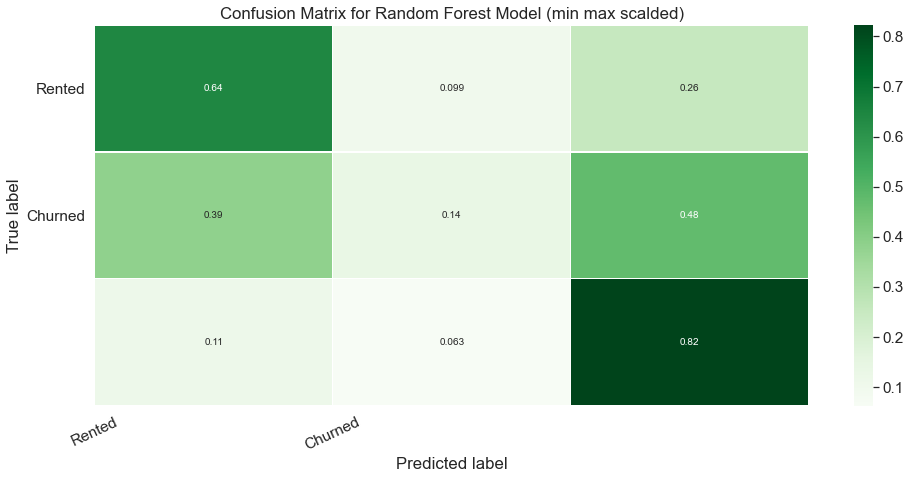

In [271]:
# Get and reshape confusion matrix data
matrix_rf = confusion_matrix(Y_test_mm, y_pred_forest_mm)
matrix_rf = matrix_rf.astype('float') / matrix_rf.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix_rf, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Rented', 'Churned']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model (min max scalded)')
plt.show()


In [272]:
# View the classification report for test data and predictions
print('\nRandom Forrest (max_depth=0, random_state=7) Classification Report (normalised)')
print(classification_report(Y_test_mm, y_pred_forest_mm))
print('\nLog Reg Classification Report (standardised)')
print(classification_report(Y_test_mm, y_pred_log_reg_std))



Random Forrest (max_depth=0, random_state=7) Classification Report (normalised)
              precision    recall  f1-score   support

          -1       0.57      0.64      0.60       312
           0       0.36      0.14      0.20       254
           1       0.66      0.82      0.73       479

    accuracy                           0.60      1045
   macro avg       0.53      0.53      0.51      1045
weighted avg       0.56      0.60      0.57      1045


Log Reg Classification Report (standardised)
              precision    recall  f1-score   support

          -1       0.56      0.69      0.62       312
           0       0.29      0.11      0.16       254
           1       0.66      0.78      0.72       479

    accuracy                           0.59      1045
   macro avg       0.50      0.53      0.50      1045
weighted avg       0.54      0.59      0.55      1045



In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    

In [ ]:

#  Complete: reshape the trian input (trainX) to be [samples, time steps, features]
X_train_std = np.reshape(X_train_std, (X_train_std.shape[0], 1, X_train_std.shape[1]))
#Y_train_std = np.reshape(Y_train_std, (Y_train_std.shape[0], 1, Y_train_std.shape[1]))
print(X_train_std.shape)
print(Y_train_std.shape)
# Complete: reshape the test input (testX) to be [samples, time steps, features]
X_test_std = np.reshape(X_test_std, (X_test_std.shape[0], 1, X_test_std.shape[1]))
print(X_test_std.shape)


ValueError: cannot reshape array of size 272745 into shape (3135,1,1)

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

look_back=1

#model
model = Sequential()
model.add(LSTM(4, input_shape=(1, 13)))
model.add(Dense(1))
model.add(Dropout(0.2))



In [ ]:
# Complete: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Complete: Fit the model
batch_size = 1
epochs = 100
model.fit(X_train_std, Y_train_std, epochs=epochs, batch_size=batch_size)



Epoch 1/100


ValueError: in user code:

    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential_5: expected shape=(None, None, 13), found shape=(1, 1, 87)


In [ ]:
import math

# make predictions
trainPredict = model.predict(X_train_std)
testPredict = model.predict(X_test_std)
# invert predictions
trainPredict = std_scaler.inverse_transform(trainPredict)
Y_train_std = std_scaler.inverse_transform([Y_train_std])
testPredict = std_scaler.inverse_transform(testPredict)
Y_test_std = std_scaler.inverse_transform([Y_test_std])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Y_train_std[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_train_std[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


ValueError: in user code:

    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/lucmaingard/opt/anaconda3/envs/AnacondaEnv/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential_4: expected shape=(None, None, 13), found shape=(None, 1, 87)


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(ohe_final)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Complete: Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), c='b')
plt.plot(trainPredictPlot, c='g')
plt.plot(testPredictPlot, c='r')
plt.title("Predictions vs Actual Data")
plt.show